<a href="https://colab.research.google.com/github/Jeen-Freecs/DS_Pet_Projects/blob/main/Numerical%20Algorithms/Numerical_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project: Numerical Optimization



**Abstract**

This assignment mostly devoted to Multi-dimensional Unconstrained Optimization.In other words, we will try to find the minimum and maximum values of the two-dimensional function.We will use direct methods which do not require gradients.


**Introduction**

In this assignment we're asked to analyze the following function:

$$\psi(x,y) = \exp[-\gamma ((x-a_{1})^2+(y-b_{1})^2) + i (k_{1x} x + k_{1y}y)]+\exp[-\gamma ((x-a_{2})^2+(y-b_{2})^2) + i (k_{2x} x + k_{2y}y)] + \exp[-\gamma ((x-a_{3})^2+(y-b_{3})^2) + i (k_{3x} x + k_{3y}y)],$$

It is a total wave function of three quantum gaussian wavepackets.
We decided to apply the Random search method, which will calculate the function at randomly selected values.Then, we made an exploratory analysis and choose the Scipy.optimization library for finding the values through its functions.



**Main Body**




**Task 1**

In this task we will import all necessary libraries and functions.Mainly, we will create our wave function.

In [ ]:
from scipy import *
from scipy.optimize import *
from sympy import * 
import numpy as np
import cmath
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def p(a,b):
  return (abs(cmath.exp((-1/25)*((a+5)**2+(b)**2)+cmath.sqrt(-1)*(5*a))+cmath.exp((-1/25)*((a-4)**2+(b-4)**2)+cmath.sqrt(-1)*(5*b))+cmath.exp((-1/25)*((a)**2+(b+5)**2)+cmath.sqrt(-1)*(3*a-4*b))))**2

**Task 2**

In this task we will analyze the function by plotting its visualization.



*   Created two sets x and y from 0 to 20
*   Then we transformed these sets to Cartesian product.Creationg of coordinate matrices
*   Transformed our function to a vectorized form for efficient way of calculating the cartesian product.
*   Plotted the 3-D figure using the magma palette for a better vision.




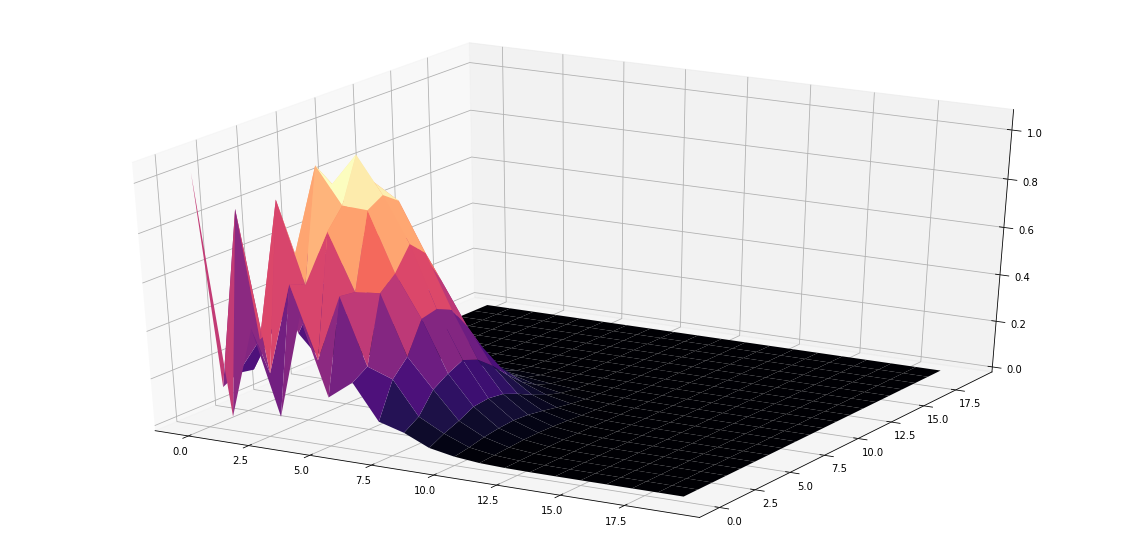

In [ ]:
x = np.arange(0,20,1)
y = np.arange(0,20,1)
z = np.zeros( (x.size, y.size), float )

#Cartesian Product
X, Y = np.meshgrid(x, y)

#Create a vectorized form of our function
p_vectorized = np.vectorize(p)
Z = p_vectorized(X,Y)

#Plotting the 3D figure
plt.figure(figsize=(20, 10))
ax = plt.axes(projection= '3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='magma', edgecolor=None)

Here we decided that domain should be specified from 0 to 10 due to analyzis of 3D plot where the maximum values appear on this period (0,10)&(0,10) for x and y.Also we can see that max value of this function should be around 1.0.

**Task 3**



Implemenatation of Random Search algorithm where we use random.random() function.This function generates a random float number uniformly distributed from 0 to 1.

The Random Search method is slow, however it can be applied with any function.This simple algorithm calculateds the global max/min values even for discontinuous and nondifferentiable functions.


In this algorithm we assigned the first approximation as x_1 and y_1 for a further application in task 4.

In [ ]:
import random
f_max = 0
for i in range(10000):
  x_app = 0 + (10)*random.random()
  y_app = 0 + (10)*random.random()
  if i == 0:
    print('First approximations for x and y: ', x_app, y_app)
    x_1 = x_app
    y_1 = y_app
  f_app = p(x_app,y_app)
  if f_app > f_max:
    f_max = f_app
    x_max = x_app
    y_max = x_app

print(f_max,x_max,y_max)

First approximations for x and y:  4.336343831983557 6.343890616008293
1.0772142104989642 3.157448241757611 3.157448241757611


Here we can see that the maximum value of function is 1.0772142104989642 as we proposed in task 2 that max value should be aroud 1.0.

**Task 4**

In this task we are using the scipy.optimize library and its function "minimize" for finding the max/min values. We applied the Nelder-Mead simplex algorithm. This algorithm doesn't apply gradient form of function, so it can take longer to find the minimum/maximum.

It should be noted  that this algorithm designed to find the minimum of the function, therefore we have decided to take the negative of our function in order to find the maximium values.

*   For a more efficient way of using our function in this algorthm we rewrite it using  arrays.
*   We implemened the minimize function with a threshold error 1e-7 for finding the minimum.
*   Then we calculated the maximum by a strategy mentioned above, relatively to gradient methods.



In [ ]:
func = lambda x: (abs(cmath.exp((-1/25)*((x[0]+5)**2+(x[1])**2)+cmath.sqrt(-1)*(5*x[0]))+cmath.exp((-1/25)*((x[0]-4)**2+(x[1]-4)**2)+cmath.sqrt(-1)*(5*x[1]))+cmath.exp((-1/25)*((x[0])**2+(x[1]+5)**2)+cmath.sqrt(-1)*(3*x[0]-4*x[1]))))**2

In [ ]:
minimize(func , (x_1,y_1), method='Nelder-Mead', tol=1e-7)

 final_simplex: (array([[ 18.23191203, 111.42727912],
       [ 18.23191203, 111.42727918],
       [ 18.23191204, 111.42727918]]), array([0., 0., 0.]))
           fun: 0.0
       message: 'Optimization terminated successfully.'
          nfev: 144
           nit: 43
        status: 0
       success: True
             x: array([ 18.23191203, 111.42727912])

In [ ]:
minimize(lambda x: -func(x), (x_1,y_1), method='Nelder-Mead', tol=1e-7)

 final_simplex: (array([[3.99771315, 4.081826  ],
       [3.99771321, 4.08182604],
       [3.99771311, 4.081826  ]]), array([-1.07358934, -1.07358934, -1.07358934]))
           fun: -1.0735893438105026
       message: 'Optimization terminated successfully.'
          nfev: 127
           nit: 65
        status: 0
       success: True
             x: array([3.99771315, 4.081826  ])

The minimum of our function, which was calculated by Nelder-Mead method, is 0.0, as expected due to the range of our function.

Min.val = 0.0

The maximum was approximated by -1.0735893438105026, however we take the absolute value of it as we took the negative of our function.

Max.val  = 1.0735893438105026

The coordinates of the maximum value is [3.99771315, 4.081826]

Would it be possible to reach the accuracy of 10$^{-12}$ in your calculations? 
I think no because of the complexity of the function which can affect the Round-off error of calculated values

**Conclusion**

To conclude, we made the analysis of our function, where we made a guess that the maximum value might be around 1.0. Then  we calculated the maximum by Random Search and Nelder-Mead method which both do not require gradients.


*   Maximum Value by Random Search method  = 1.0772142104989642
*   Maximum Values by Nelder-Mead method  = 1.0735893438105026



